### Table of Contents

* [1. Imports des librairies ](#Imports1)
* [2. Imports des bases des données ](#DATA2)
* [3. Nettoyage des données ](#nettoyage3)
* [4. Analyse exploratoire ](#exp_4)

### 1.Imports des librairies  <a class="anchor" id="Imports1"></a>
### 2.Imports de la base des données  <a class="anchor" id="DATA2"></a>
### 3.Nettoyage des données  <a class="anchor" id="nettoyage3"></a>
### 4 Analyse exploratoire <a class="anchor" id="exp_4"></a>

### 1.Imports des librairies  <a class="anchor" id="Imports1"></a>

In [1]:
# Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chouikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chouikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chouikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### 2.Imports de la base des données  <a class="anchor" id="DATA2"></a>

In [2]:
df=pd.read_csv('C:/Users/chouikhi/Downloads/QueryResults (2).csv')

In [3]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,React Native - `require()` statement exception...,<p><strong>TL;DR:</strong> I want to be able t...,<javascript><android><ios><react-native><momen...,39245384,6,1364,NaN,2
1,Message specific user in a Phonegap/Cordova ap...,<p>I am attempting to create a real-time commu...,<android><asp.net-mvc><cordova><signalr><signa...,39245416,3,121,NaN,1
2,WinApi Commctrl trackbar identifier undeclared,<p>I'm trying to handle a trackbar notificatio...,<c><windows><winapi><gcc><trackbar>,39245423,0,172,NaN,1
3,Programmatically created products doesn't show...,<p>I created a cron job to fetch wholesaler pr...,<php><mysql><wordpress><woocommerce><product>,39245424,2,452,NaN,1
4,Images have a fubar color palette when generat...,<p>When generating a png image file in Mathema...,<linux><image-processing><x11><wolfram-mathema...,953065,0,413,NaN,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   ViewCount      50000 non-null  int64  
 6   FavoriteCount  11092 non-null  float64
 7   AnswerCount    50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [5]:
df.duplicated().sum()

0

### 3.Nettoyage des données  <a class="anchor" id="nettoyage3"></a>

In [6]:
pip install langdetect

In [7]:
from langdetect import detect

for index in df.index:
  df.loc[index,'lang'] = detect(df.loc[index,'Body']) 

df['lang'].value_counts()

en    49518
ca      224
fr      191
nl       32
da        9
pt        7
es        5
no        3
sl        2
et        2
tl        1
de        1
sv        1
af        1
so        1
tr        1
id        1
Name: lang, dtype: int64

In [8]:
df = df[df['lang']=='en']

In [9]:
#Premièrement, nous supprimons les <>  contenant dans les tags:

for index in df.index:
   # Replace open and close balise 
   df.loc[index,'Tags']=df.loc[index,'Tags'].replace('<','').replace('>', ' ')


# Delete last extras space for each row
df['Tags'] = df['Tags'].str[:-1]
df.Tags.head()

0         javascript android ios react-native momentjs
1      android asp.net-mvc cordova signalr signalr-hub
2                        c windows winapi gcc trackbar
3              php mysql wordpress woocommerce product
4    linux image-processing x11 wolfram-mathematica...
Name: Tags, dtype: object

In [10]:
#Le Corps des questions est sauvegardé généralement avec les balises HTML, il contient aussi du code. Nous allons ainsi supprimer ceux deux bruits dans le corps des questions.

def remove_code(x):
    """Function based on the Beautifulsoup library intended to replace 
    the content of all the <code> </code> in the body of a text specified as a parameter.
    """
    soup = BeautifulSoup(x,"lxml")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    return str(soup)
#deleting code and html in the body of dataframe
df['Body'] = df['Body'].apply(lambda text: remove_code(text))
df.Body = [BeautifulSoup(text,"lxml").get_text() for text in df.Body]

In [11]:
df[['Body','Tags']].head()

,Body,Tags
0,TL;DR: I want to be able to a module in an...,javascript android ios react-native momentjs
1,I am attempting to create a real-time communic...,android asp.net-mvc cordova signalr signalr-hub
2,"I'm trying to handle a trackbar notification, ...",c windows winapi gcc trackbar
3,I created a cron job to fetch wholesaler produ...,php mysql wordpress woocommerce product
4,When generating a png image file in Mathematic...,linux image-processing x11 wolfram-mathematica...


In [12]:
import spacy

In [13]:
!pip install -U spacy download en_core_web_sm

In [14]:
import en_core_web_sm

In [15]:
nlp = en_core_web_sm.load()


In [16]:

# Delete STOP WORDS
def del_stop_words(text):
    document = nlp(text)
    words = [token.text for token in document if not token.is_stop]
    return ' '.join(words)

In [17]:
 for f in ["Body", "Title"]:
        df[f] = df[f].apply(del_stop_words)

In [18]:
def clean_text(text):
    #Make text lowercase
    text = text.lower()
    # Remove English contractions
    text = re.sub("\'\w+", ' ', text)
    #
    text = text.encode("ascii", "ignore").decode()
    # Remove ponctuation (except # and ++ for c# and c++)
    text = re.sub('[^\\w\\s#\\s++]', ' ', text)
    # Remove numbers
    text = re.sub(r'\w*\d+\w*', ' ', text)
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    return text

# Applying the cleaning function 
df['Body'] = df['Body'].apply(lambda text: clean_text(text))
df['Title'] = df['Title'].apply(lambda text: clean_text(text))
df['Tags'] = df['Tags'].apply(lambda text: clean_text(text))

In [19]:
df[['Body','Title','Tags']].head(20)

,Body,Title,Tags
0,tl dr want able module handle exception case m...,react native require statement exception handling,javascript android ios react native momentjs
1,attempting create real time communication capa...,message specific user phonegap cordova app sig...,android asp net mvc cordova signalr signalr hub
2,trying handle trackbar notification reason gcc...,winapi commctrl trackbar identifier undeclared,c windows winapi gcc trackbar
3,created cron job fetch wholesaler product list...,programmatically created products woocommerce,php mysql wordpress woocommerce product
4,generating png image file mathematica linux bo...,images fubar color palette generated xvfb inst...,linux image processing wolfram mathematica vnc
5,best way slider control slides path moment thi...,customise wpf slider control slide path,c# wpf xaml wpf controls slider
6,need set legacy app uses tomcat runs jdk tried...,possible java bit ubuntu,java linux ubuntu bit
7,site encoded quote url path causes illegal cha...,encode quotation marks asp net complaining,asp net full text search url routing quotes ur...
8,newbie java coder read variable integer class ...,integer value comparison,java integer int equals autoboxing
9,want user choose data analyzing data code righ...,wait user input keyboard r line code readline ...,r input wait readline pause


In [20]:
def words_tokenize(text):
  text = text.split()
  return text

df['Body'] = df.Body.apply(lambda text: words_tokenize(text))
df['Title'] = df.Title.apply(lambda text: words_tokenize(text))
df['Tags'] = df.Tags.apply(lambda text: words_tokenize(text))

In [21]:
df[['Body','Title','Tags']].head()

,Body,Title,Tags
0,"[tl, dr, want, able, module, handle, exception...","[react, native, require, statement, exception,...","[javascript, android, ios, react, native, mome..."
1,"[attempting, create, real, time, communication...","[message, specific, user, phonegap, cordova, a...","[android, asp, net, mvc, cordova, signalr, sig..."
2,"[trying, handle, trackbar, notification, reaso...","[winapi, commctrl, trackbar, identifier, undec...","[c, windows, winapi, gcc, trackbar]"
3,"[created, cron, job, fetch, wholesaler, produc...","[programmatically, created, products, woocomme...","[php, mysql, wordpress, woocommerce, product]"
4,"[generating, png, image, file, mathematica, li...","[images, fubar, color, palette, generated, xvf...","[linux, image, processing, wolfram, mathematic..."


In [22]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [23]:
# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()
def lem_word(text):
  # 3. Lemmatize with the appropriate POS tag
  return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text]

df['Body'] = df.Body.apply(lem_word)
df['Title'] = df.Title.apply(lem_word)
df['Tags'] = df.Tags.apply(lem_word)  

In [24]:
df[['Body','Title','Tags']].head()

,Body,Title,Tags
0,"[tl, dr, want, able, module, handle, exception...","[react, native, require, statement, exception,...","[javascript, android, io, react, native, momen..."
1,"[attempt, create, real, time, communication, c...","[message, specific, user, phonegap, cordova, a...","[android, asp, net, mvc, cordova, signalr, sig..."
2,"[try, handle, trackbar, notification, reason, ...","[winapi, commctrl, trackbar, identifier, undec...","[c, window, winapi, gcc, trackbar]"
3,"[create, cron, job, fetch, wholesaler, product...","[programmatically, create, product, woocommerce]","[php, mysql, wordpress, woocommerce, product]"
4,"[generate, png, image, file, mathematica, linu...","[image, fubar, color, palette, generate, xvfb,...","[linux, image, processing, wolfram, mathematic..."


In [25]:
#On construit une list de tous les Tags
Tag_tokens = [token for token_list in df.Tags for token in token_list]
df_word_freq = pd.DataFrame(nltk.FreqDist(Tag_tokens).items(),columns=['tag', 'frequency']).set_index('tag')
df_word_freq.sort_values("frequency", ascending=False, inplace=True)
# Top 200 tags
Top200_tag = df_word_freq.iloc[0:200, :].index
print("top des 20 tags:", Top200_tag[0:20].values)

top des 20 tags: ['python' 'javascript' 'net' 'java' 'android' 'c#' 'html' 'asp' 'j' 'sql'
 'php' 'jquery' 'spring' 'google' 'c++' 'io' 'web' 'cs' 'c' 'api']


In [26]:
df.Tags = df.Tags.apply(lambda raw : list(set(raw)))
df.Title = df.Title.apply(lambda raw : list(set(raw)))
df.Body = df.Body.apply(lambda raw : list(set(raw)))

### 4 Analyse exploratoire <a class="anchor" id="exp_4"></a>

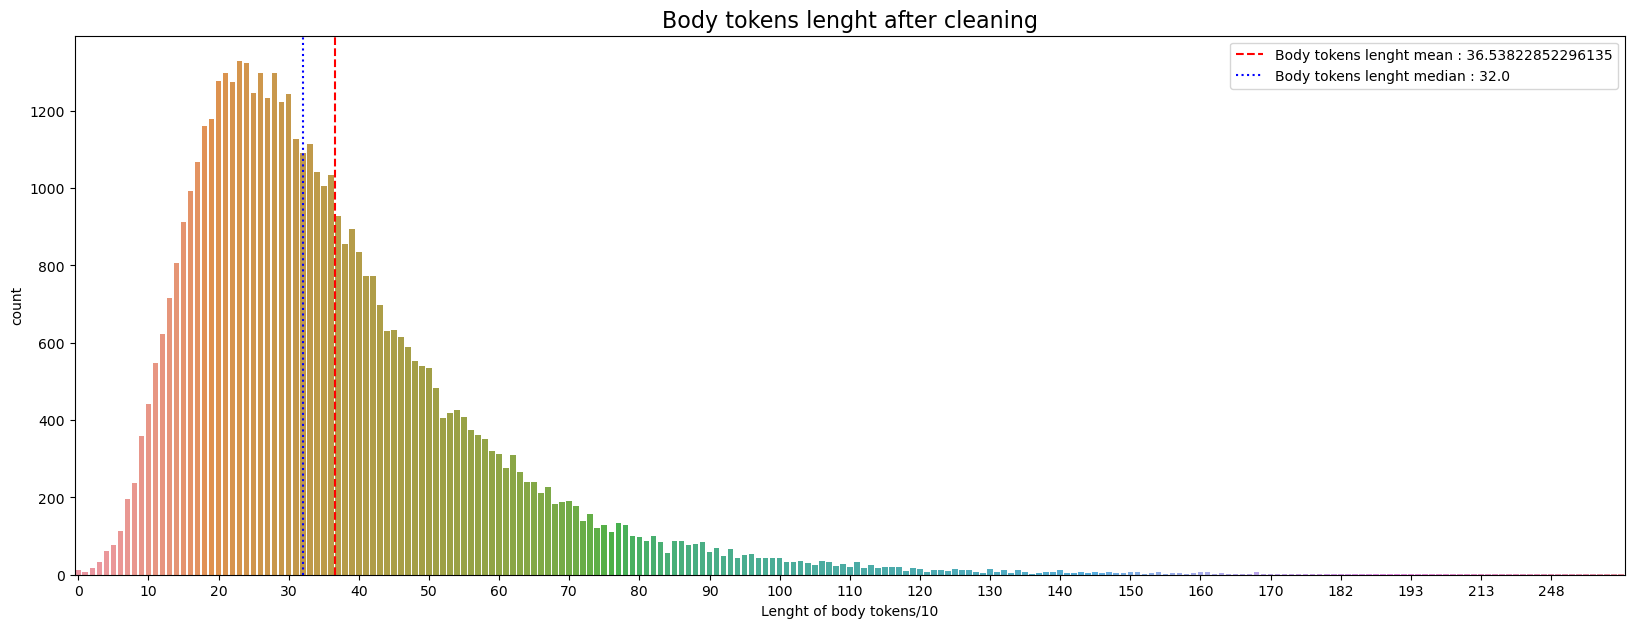

In [27]:
# Calculate lenght of each list in Body
df['body_count'] = [len(raw) for raw in df.Body]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 7))
ax = sns.countplot(x=df.body_count)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, int(end), 10))
plot_mean = df.body_count.mean()
plot_median = df.body_count.median()
plt.axvline(plot_mean, color="r", linestyle='--', label="Body tokens lenght mean : "+str(plot_mean))
plt.axvline(plot_median, color="b", linestyle=':', label="Body tokens lenght median : "+str(plot_median))
ax.set_xlabel("Lenght of body tokens/10")
plt.title("Body tokens lenght after cleaning",
          fontsize=16)
plt.legend()
plt.show()

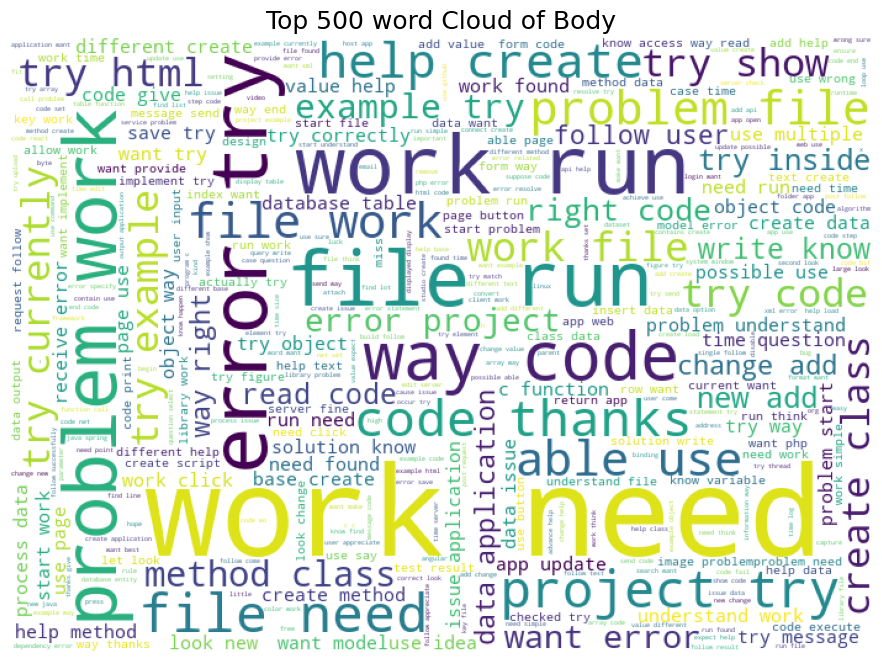

In [28]:
body_tokens = [token for token_list in df.Body for token in token_list]
fig = plt.figure(1, figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=700, height=500,
                      background_color="white",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False).generate(" ".join(body_tokens))

ax.imshow(wordcloud)
ax.axis("off")
plt.title("Top 500 word Cloud of Body", fontsize=18)
plt.show()

In [29]:
df.shape

(49518, 10)

In [30]:
# Filter data on body lenght
df = df[(5<df['body_count']) & (df['body_count']<=120)]
df.shape


(48947, 10)

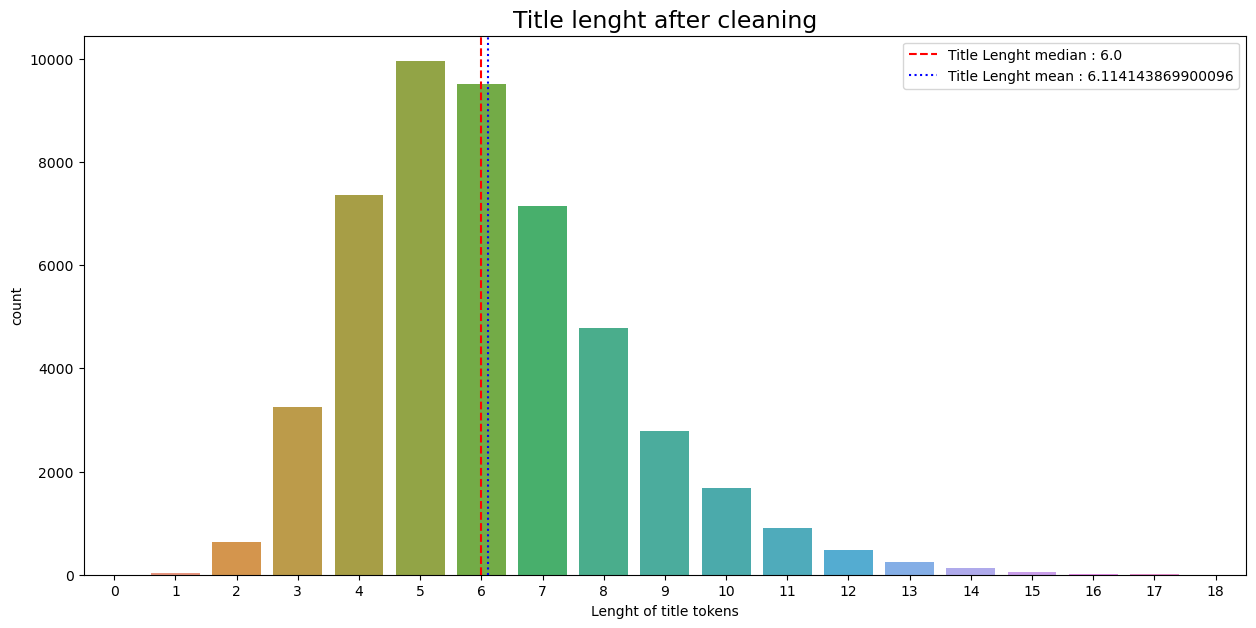

In [31]:
 #Calculate lenght of each list in Body
df['Title_count'] = [len(text) for text in df.Title]

# Countplot of body lenght
fig = plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df.Title_count)
median_t = df.Title_count.median()
plt.axvline(median_t ,
            color="r", linestyle='--',
            label="Title Lenght median : "+str(median_t))
mean_t = df.Title_count.mean()
plt.axvline(mean_t ,
            color="b", linestyle=':',
            label="Title Lenght mean : "+str(mean_t))
ax.set_xlabel("Lenght of title tokens")
plt.title("Title lenght after cleaning",
          fontsize=17)
plt.legend()
plt.show()

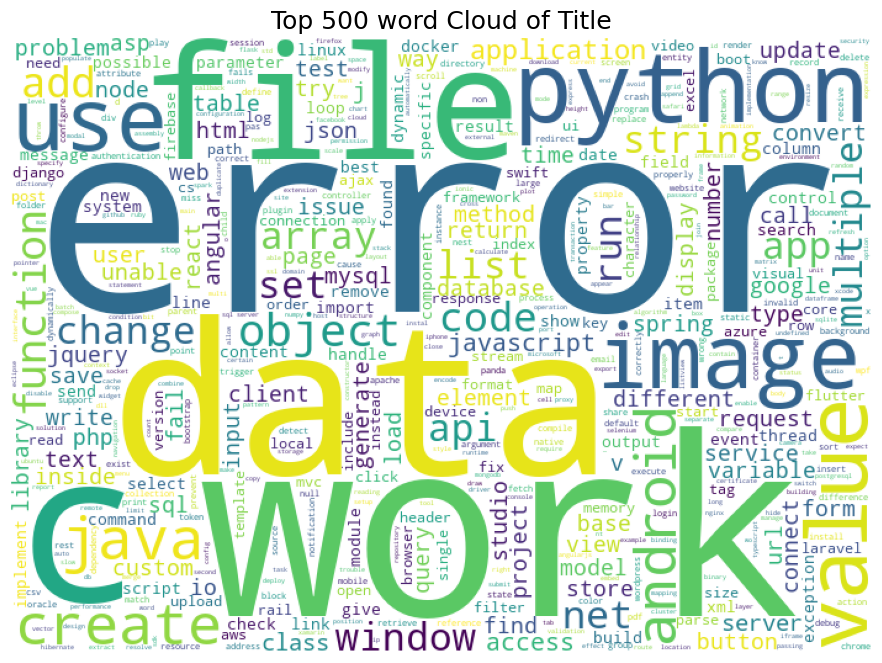

In [32]:
title_tokens = [token for token_list in df.Title for token in token_list]
fig = plt.figure(1, figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=700, height=500,
                      background_color="white",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False).generate(" ".join(title_tokens))

ax.imshow(wordcloud)
ax.axis("off")
plt.title("Top 500 word Cloud of Title", fontsize=18)
plt.show()

In [33]:
# Filter data on body lenght
df = df[(df['Title_count']>1)&(df['Title_count']<9)]
df.shape

(42607, 11)

In [34]:
# list of tags tokens
Tag_tokens = [token for token_list in df.Tags for token in token_list]
df_word_freq = pd.DataFrame(nltk.FreqDist(Tag_tokens).items(),columns=['tag', 'frequency']).set_index('tag')
df_word_freq.sort_values("frequency", ascending=False, inplace=True)
df_word_freq.head(10)

,frequency
tag,
javascript,6042
python,5273
java,4789
c#,4227
net,3699
html,3101
android,2855
php,2614
jquery,2336


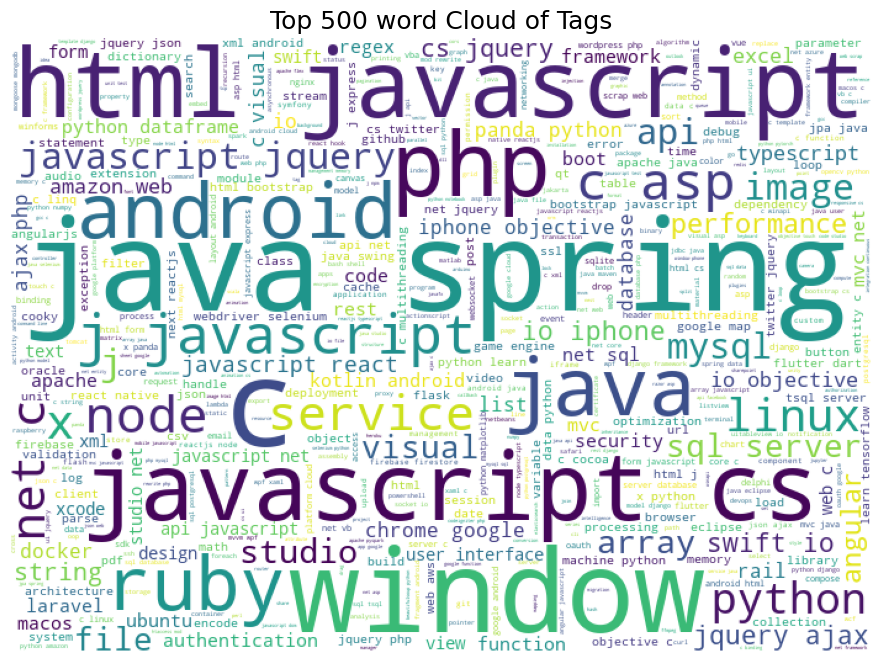

In [35]:
fig = plt.figure(1, figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=700, height=500,
                      background_color="white",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False).generate(" ".join(Tag_tokens))

ax.imshow(wordcloud)
ax.axis("off")
plt.title("Top 500 word Cloud of Tags", fontsize=18)
plt.show()

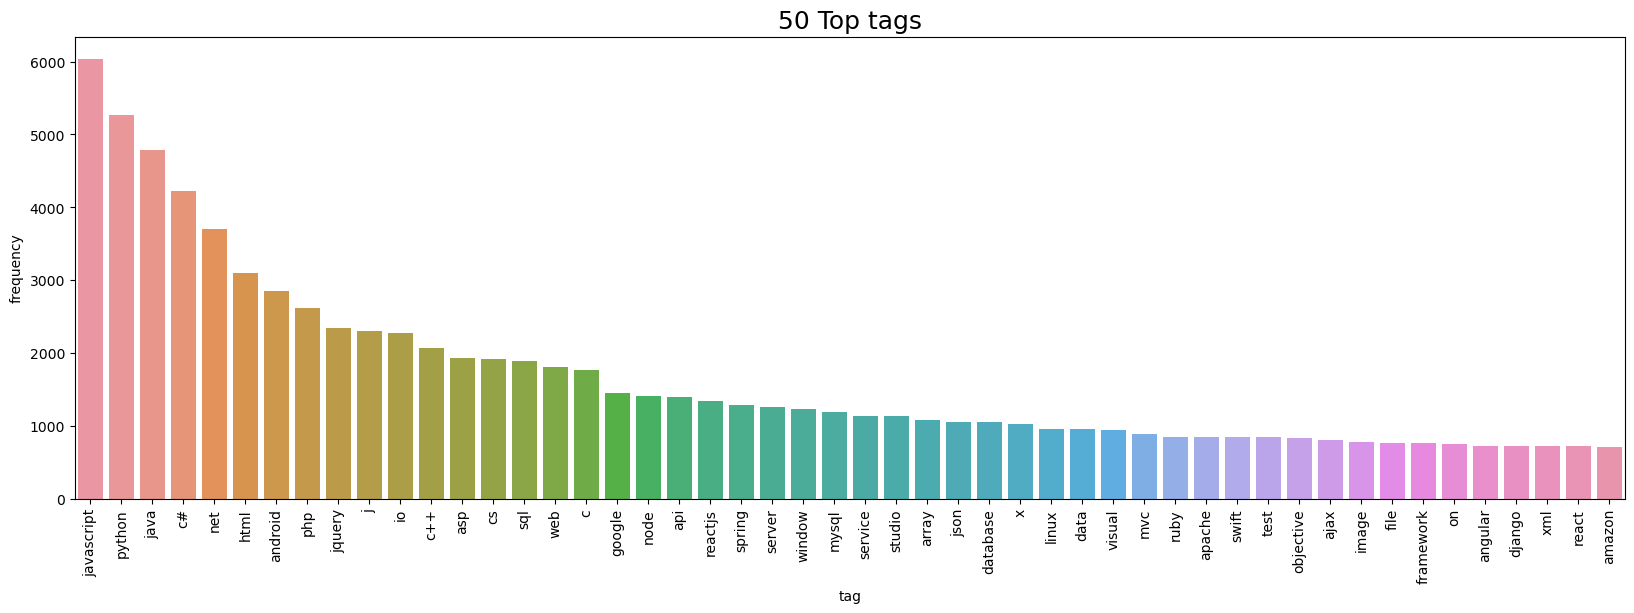

In [36]:
fig = plt.figure(figsize=(20, 6))
sns.barplot(data=df_word_freq.iloc[0:50, :],
            x=df_word_freq.iloc[0:50, :].index,y="frequency")
plt.xticks(rotation=90)
plt.title("50 Top tags",fontsize=18)
plt.show()

In [37]:
# filtering data within top 50 tags
def filter_tags(raw):
    tokens = [w for w in raw if w in  df_word_freq[0:50].index ]
    return tokens 

df.Tags = df.Tags.apply(lambda word : filter_tags(word))

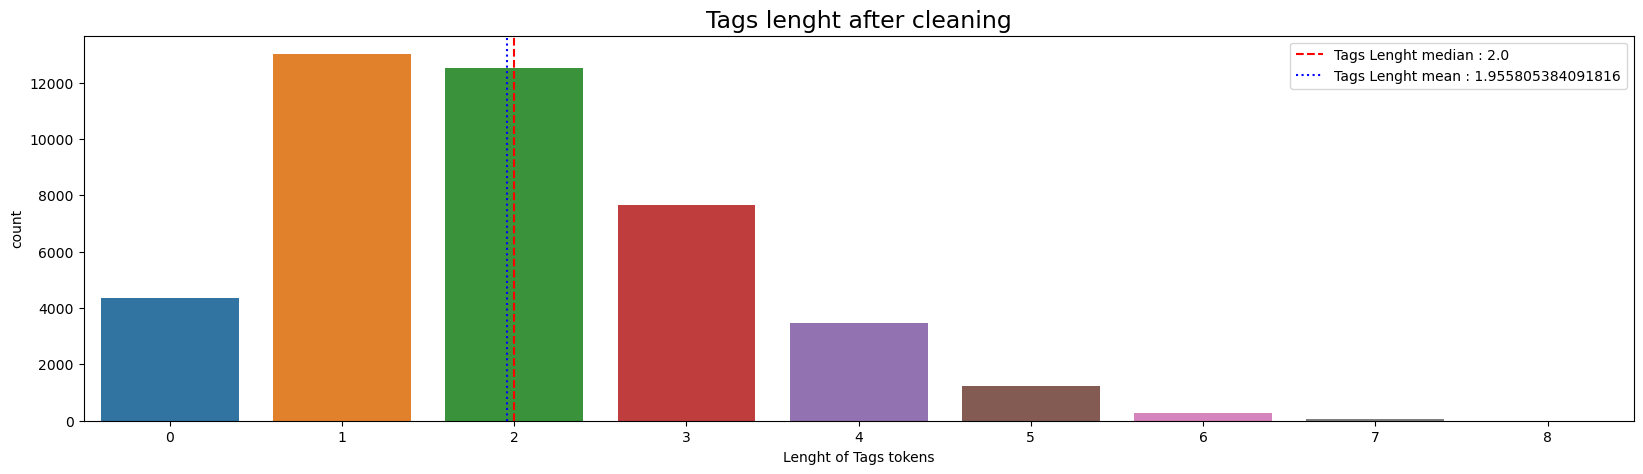

In [38]:
# Calculate lenght of each list in Body
df['Tags_count'] = [len(text) for text in df.Tags]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 5))
ax = sns.countplot(x=df.Tags_count)
median_T = df.Tags_count.median()
plt.axvline(median_T ,
            color="r", linestyle='--',
            label="Tags Lenght median : "+str(median_T))
mean_T = df.Tags_count.mean()
plt.axvline(mean_T ,
            color="b", linestyle=':',
            label="Tags Lenght mean : "+str(mean_T))
ax.set_xlabel("Lenght of Tags tokens")
plt.title("Tags lenght after cleaning",
          fontsize=17)
plt.legend()
plt.show()

In [39]:
# Filter data on body lenght
df = df[df['Tags_count']>0]
df.shape

(38262, 12)

In [40]:
df['text_comb'] = df['Body'] + df['Title']
df.text_comb = df.text_comb.apply(lambda raw : list(set(raw)))

Nous allons filtrer nos données suivant les lignes de la colonne de "text_cmob" contenant au moins un tokens de Body correspndant.

In [41]:
top_tag = df_word_freq[0:50].index
# compute the variable Tags_shar_length which is zero when there is no shared token between "tex_comb" raw and "top_tag" tokens
df['Tags_shar_length'] = df.text_comb.apply(lambda raw : len(top_tag)-len(set(top_tag)-set(raw)))
df = df[df['Tags_shar_length']>0]
df.shape

(33164, 14)

In [42]:
df[['text_comb','Title','Body']].head()

,text_comb,Title,Body
0,"[library, tree, hurt, presets, locale, found, ...","[statement, handle, react, native, exception, ...","[library, tree, hurt, presets, locale, found, ..."
1,"[username, need, particular, phonegap, time, a...","[message, user, phonegap, cordova, app, specif...","[username, need, particular, phonegap, time, a..."
2,"[problem, file, undeclared, trackbar, bat, com...","[undeclared, identifier, trackbar, commctrl, w...","[problem, file, undeclared, trackbar, bat, ins..."
3,"[problem, click, product, edit, shop, enter, a...","[woocommerce, product, create, programmatically]","[problem, click, product, edit, shop, enter, a..."
6,"[run, need, sun, download, us, follow, tomcat,...","[ubuntu, bit, java, possible]","[need, run, sun, download, us, follow, tomcat,..."


In [43]:
# Export to CSV
df[['Title', 'Body','Tags','text_comb']].to_csv("data_cleaned.csv", index=False,sep=';')